In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
print(train.shape, test.shape)

(891, 12) (418, 11)


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [9]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train['Embarked'].fillna('S', inplace=True)

In [11]:
test['Fare'].fillna(test["Fare"].mean(), inplace=True)

In [12]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [13]:
# 177 and 86 random null values created using random function in train and test dataset respectively

In [14]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [15]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [16]:
train['Age'][train['Age'].isnull()]=train_age
test['Age'][test['Age'].isnull()]=test_age

In [17]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### EDA

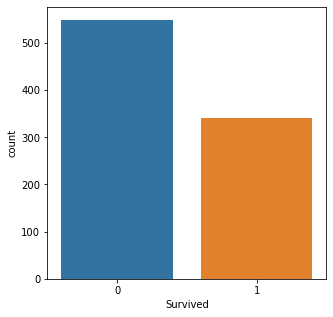

In [18]:
plt.figure(figsize=(5,5))
sb.countplot(x="Survived",data=train)

In [20]:
# check the corelatin between features
# check how many passenger survived and died in each class

In [21]:
print(train[train['Pclass']==1]['Survived'].value_counts())
print(train[train['Pclass']==2]['Survived'].value_counts())
print(train[train['Pclass']==3]['Survived'].value_counts())

1    136
0     80
Name: Survived, dtype: int64
0    97
1    87
Name: Survived, dtype: int64
0    372
1    119
Name: Survived, dtype: int64


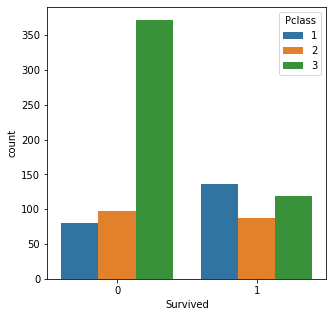

In [22]:
plt.figure(figsize=(5,5))
sb.countplot(x='Survived', hue='Pclass', data=train)

In [23]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [24]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

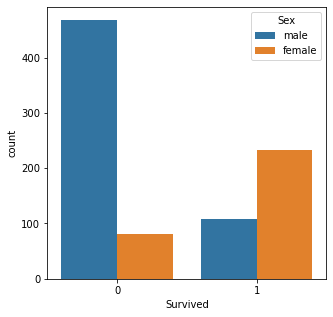

In [25]:
plt.figure(figsize=(5,5))
sb.countplot(x='Survived', hue='Sex', data=train)

In [26]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

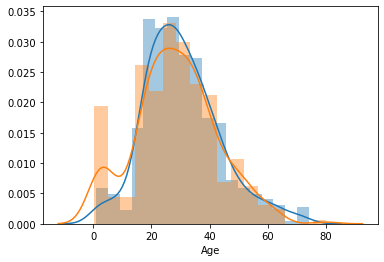

In [27]:
sb.distplot(train['Age'][train['Survived']==0])
sb.distplot(train['Age'][train['Survived']==1])

In [28]:
train.drop(columns=['Ticket'], inplace=True)
test.drop(columns=['Ticket'], inplace=True)

In [29]:
# Family=(sibblig/Spous + Parch("of parents/ children aboard the titanic")+own passenger)

train['family']=train['SibSp']+train['Parch']+1 
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

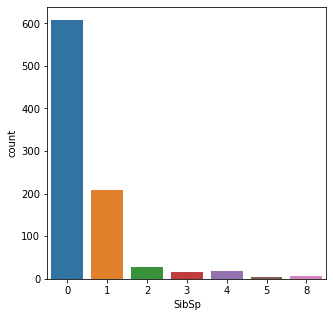

In [30]:
plt.figure(figsize=(5,5))
sb.countplot(x='SibSp', data=train)

In [31]:
test['family']=test['SibSp']+test['Parch']+1 
test['family'].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: family, dtype: int64

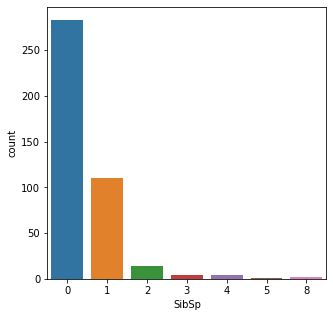

In [32]:
plt.figure(figsize=(5,5))
sb.countplot(x='SibSp', data=test)

In [33]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [34]:
def cal(number):
    
    if number==1:
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"

In [35]:
train['family_size']=train['family'].apply(cal)
test['family_size']=test['family'].apply(cal)

In [36]:
train.drop(columns=['SibSp','Parch','family'], inplace=True)
test.drop(columns=['SibSp','Parch','family'], inplace=True)

In [37]:
passengerId=test['PassengerId'].values

In [38]:
train.drop(columns=['Name','PassengerId'], inplace=True)
test.drop(columns=['Name','PassengerId',], inplace=True)

In [39]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [40]:
train=pd.get_dummies(train, columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [41]:
train.shape

(891, 10)

In [42]:
test=pd.get_dummies(test, columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)
test.shape

(418, 9)

In [43]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [44]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts (X, y, test_size=0.2)

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [46]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8156424581005587

In [49]:
test.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,34.5,7.8292,0,1,1,1,0,0,0
1,47.0,7.0000,0,1,0,0,1,0,1
2,62.0,9.6875,1,0,1,1,0,0,0
3,27.0,8.6625,0,1,1,0,1,0,0
4,22.0,12.2875,0,1,0,0,1,0,1


In [50]:
Xf=test.iloc[:,:].values
y_final=classifier.predict(Xf)
y_final

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,

In [51]:
final=pd.DataFrame()
final['PassengerId']=passengerId
final['Survived']=y_final
final.to_csv("Submission.csv", index=False)

In [52]:
pd.read_csv('Submission.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
